In [1]:
%matplotlib widget

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
plt.style.use("ggplot")

In [4]:
# Create: User Parameters

path_results = "/Users/slane/Documents/research/results/cifar/autoencoder/lightning_logs/training/metrics.csv"

In [5]:
def load_data(path):

    return pd.read_csv(path)

In [6]:
data = load_data(path_results)

In [7]:
data

,step,lr-AdamW,epoch,train_error_step,valid_error_mse_step,valid_error_bce_step,valid_error_mse_epoch,valid_error_bce_epoch,train_error_epoch
0,0,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,NaN,0.0,0.073329,NaN,NaN,NaN,NaN,NaN
2,1,NaN,0.0,0.069388,NaN,NaN,NaN,NaN,NaN
3,2,NaN,0.0,0.062684,NaN,NaN,NaN,NaN,NaN
4,3,NaN,0.0,0.067477,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
261201,216880,NaN,277.0,0.027356,NaN,NaN,NaN,NaN,NaN
261202,216881,NaN,277.0,0.026410,NaN,NaN,NaN,NaN,NaN
261203,216882,NaN,277.0,0.026518,NaN,NaN,NaN,NaN,NaN
261204,216883,NaN,277.0,0.023780,NaN,NaN,NaN,NaN,NaN


In [8]:
print("\n------ Column Names ------\n")
for ele in data.columns:
    print(ele)


------ Column Names ------

step
lr-AdamW
epoch
train_error_step
valid_error_mse_step
valid_error_bce_step
valid_error_mse_epoch
valid_error_bce_epoch
train_error_epoch


In [9]:
def plot_data(x_vals, y_vals, title, 
              x_label, y_label, y_lim=None, 
              fig_size=(10, 5), font_size=14):

    fig, ax = plt.subplots(figsize=fig_size)

    ax.plot(x_vals, y_vals, linewidth=5)

    ax.set_title("%s" % title)
    ax.set_xlabel("%s" % x_label)
    ax.set_ylabel("%s" % y_label)

    if y_lim is not None:
        ax.set_ylim(y_lim)

    fig.tight_layout()

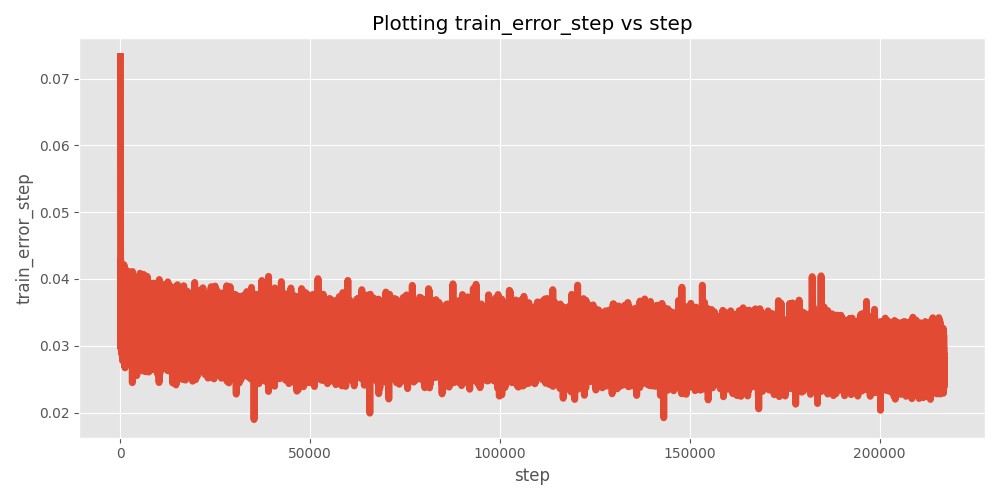

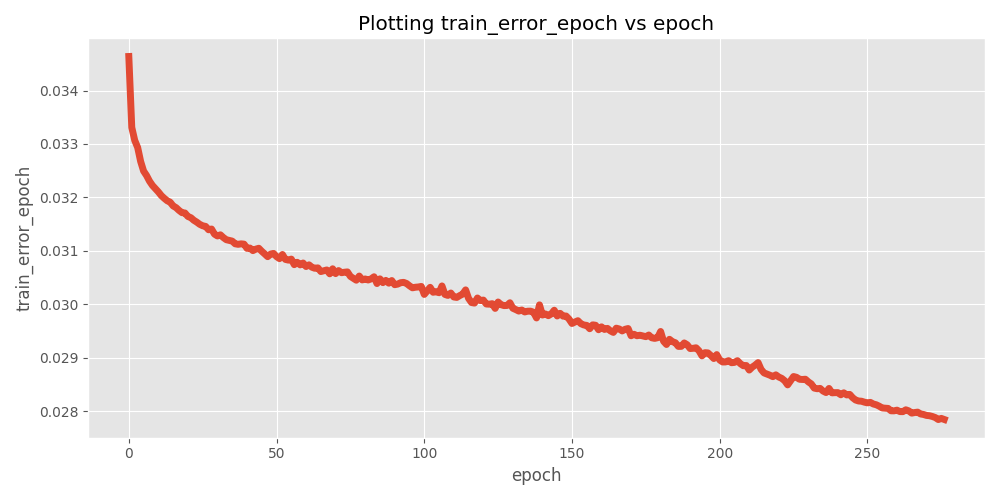

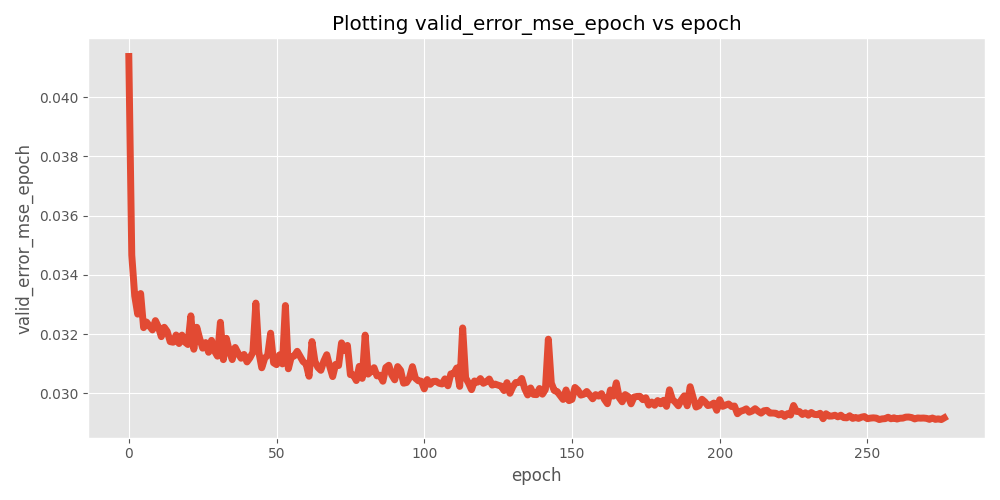

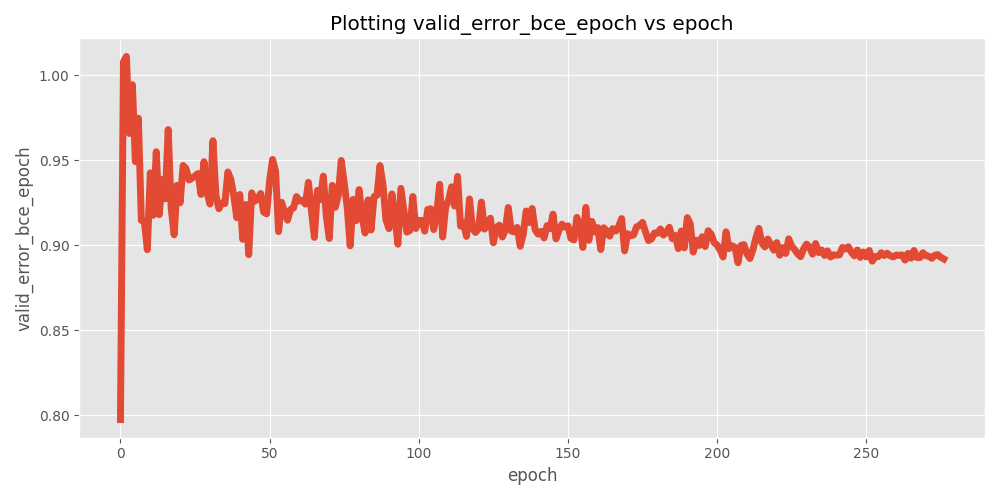

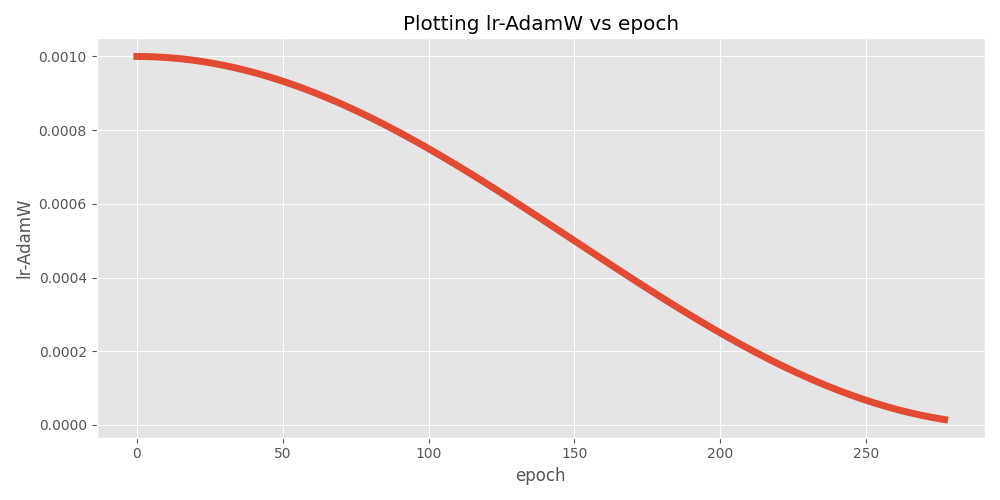

In [10]:
target_names = ["train_error_step", "train_error_epoch", "valid_error_mse_epoch", "valid_error_bce_epoch", "lr-AdamW"]

for name in target_names:

    df = data.dropna(subset=[name])
    
    if "lr" in name:
        tag = "epoch"
        x_vals = list(range(df.shape[0]))
    else:
        tag = name.split("_")[-1]
        x_vals = df[tag]
    
    y_vals = df[name]

    title = "Plotting %s vs %s" % (name, tag)
    y_label = "%s" % name
    x_label = "%s" % tag

    y_lim = (-0.005, 1.05) if "accuracy" in name else None
    plot_data(x_vals, y_vals, title, x_label, y_label, y_lim=y_lim)